## e^x

In [1]:
import numpy as np
import math

# --- Parâmetros da Análise ---
# Grau do polinômio de Taylor
N = 3
# Limite superior do intervalo de entrada reduzido |r|
r_max = np.log(2) / 2
# Alvo de precisão para a aproximação da exponencial
target_precision = 1e-4

# --- Cálculo do Resto de Lagrange ---
# R_n(r) <= [e^|r| * |r|^(N+1)] / (N+1)!
# Usamos o valor máximo de |r| para encontrar o limite superior do erro.

numerator = np.exp(r_max) * (r_max**(N + 1))
denominator = math.factorial(N + 1)
error_bound = numerator / denominator

# --- Apresentação dos Resultados ---
print(f"Análise do Erro da Série de Taylor para N = {N}")
print("-" * 40)
print(f"Domínio reduzido |r| <= {r_max:.6f}")
print(f"Alvo de precisão desejado: {target_precision:.1e}")
print(f"Limite superior do erro calculado (Resto): {error_bound:.6e}")
print("-" * 40)

# Verificação final
if error_bound <= target_precision:
    print(f"✅ SUCESSO: O erro máximo ({error_bound:.2e}) é menor ou igual ao alvo de precisão ({target_precision:.1e}).")
    print("A escolha de N=4 é validada.")
else:
    print(f"❌ FALHA: O erro máximo ({error_bound:.2e}) é maior que o alvo de precisão ({target_precision:.1e}).")
    print("Um valor maior para N pode ser necessário.")

Análise do Erro da Série de Taylor para N = 3
----------------------------------------
Domínio reduzido |r| <= 0.346574
Alvo de precisão desejado: 1.0e-04
Limite superior do erro calculado (Resto): 8.501305e-04
----------------------------------------
❌ FALHA: O erro máximo (8.50e-04) é maior que o alvo de precisão (1.0e-04).
Um valor maior para N pode ser necessário.


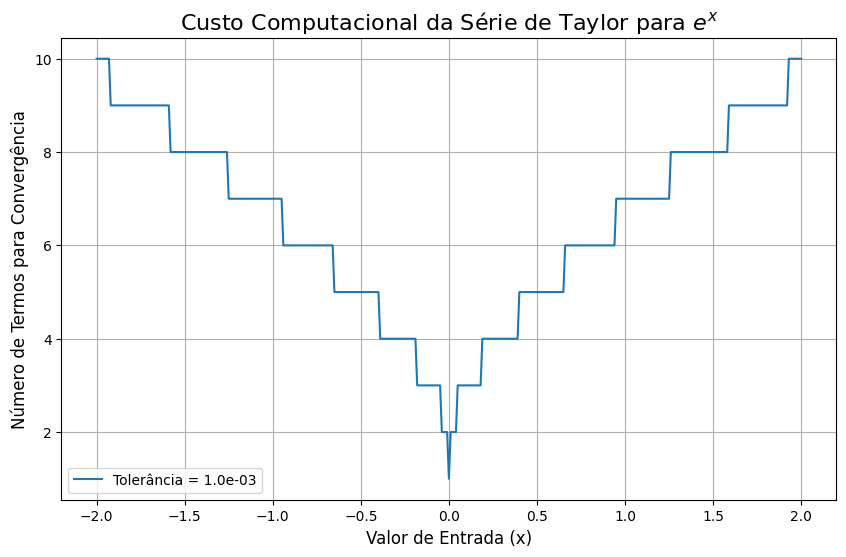

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

def exp_taylor(x, tol=1e-3):
    """
    Calcula e^x usando a expansão da Série de Taylor.
    """
    term = 1.0
    result = term
    n = 1
    if x == 0:
        return 1.0, 1
    while True:
        term *= x / n
        if abs(term) < tol:
            break
        result += term
        n += 1
    return result, n

# --- Geração de dados para o gráfico ---
# Intervalo de x
xs = np.arange(-2.0, 2.01, 0.01)
# Lista para armazenar o número de termos necessários para cada x
terms_needed = []

for x_val in xs:
    _, terms = exp_taylor(x_val, tol=1e-3)
    terms_needed.append(terms)

# --- Criação do Gráfico ---
plt.figure(figsize=(10, 6))
plt.plot(xs, terms_needed, label=f'Tolerância = {1e-3:.1e}')
plt.grid(True)
plt.title('Custo Computacional da Série de Taylor para $e^x$', fontsize=16)
plt.xlabel('Valor de Entrada (x)', fontsize=12)
plt.ylabel('Número de Termos para Convergência', fontsize=12)
plt.legend()
plt.show()

## e^-4x

In [3]:
import numpy as np
import math

def exp_taylor(x, tol=1e-3):
    """
    Calcula e^x usando a expansão da Série de Taylor.
    """
    term = 1.0
    result = term
    n = 1
    if x == 0:
        return 1.0, 1
    while True:
        term *= x / n
        if abs(term) < tol:
            break
        result += term
        n += 1
    return result, n

# --- Análise para o intervalo x ∈ [-2, 2] ---
sum_terms = 0
max_terms = 0
# O x da WSiLU varia de -2 a 2
xs = np.arange(-2, 2.01, 0.01)

for x_val in xs:
    # A exponencial é calculada sobre z = -4*x
    z = -4 * x_val
    approx, terms = exp_taylor(z, tol=1e-3)
    sum_terms += terms
    if terms > max_terms:
        max_terms = terms

average_terms = sum_terms / len(xs)

print(f"Análise para e^(-4x) com x ∈ [-2, 2] (ou seja, z ∈ [-8, 8])")
print(f"Tolerância = {1e-3:.1e}")
print("-" * 60)
print(f"Número médio de termos necessários: {average_terms:.2f}")
print(f"Número MÁXIMO de termos (nas extremidades, z=±8): {max_terms}")

Análise para e^(-4x) com x ∈ [-2, 2] (ou seja, z ∈ [-8, 8])
Tolerância = 1.0e-03
------------------------------------------------------------
Número médio de termos necessários: 15.20
Número MÁXIMO de termos (nas extremidades, z=±8): 26


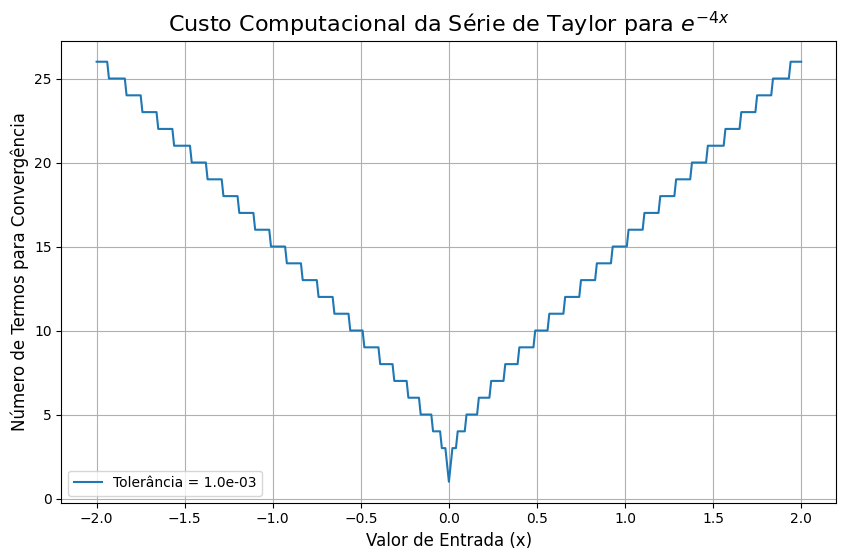

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt

def exp_taylor(x, tol=1e-3):
    """
    Calcula e^x usando a expansão da Série de Taylor.
    """
    term = 1.0
    result = term
    n = 1
    if x == 0:
        return 1.0, 1
    while True:
        term *= x / n
        if abs(term) < tol:
            break
        result += term
        n += 1
    return result, n

# --- Geração de dados para o gráfico ---
# O x da WSiLU varia de -2 a 2
xs = np.arange(-2.0, 2.01, 0.01)
# Lista para armazenar o número de termos
terms_needed = []

for x_val in xs:
    # O expoente a ser calculado é z = -4*x
    z = -4 * x_val
    _, terms = exp_taylor(z, tol=1e-3)
    terms_needed.append(terms)

# --- Criação do Gráfico ---
plt.figure(figsize=(10, 6))
plt.plot(xs, terms_needed, label=f'Tolerância = {1e-3:.1e}')
plt.grid(True)
plt.title('Custo Computacional da Série de Taylor para $e^{-4x}$', fontsize=16)
plt.xlabel('Valor de Entrada (x)', fontsize=12)
plt.ylabel('Número de Termos para Convergência', fontsize=12)
plt.legend()
plt.show()